In [39]:
library(pracma)

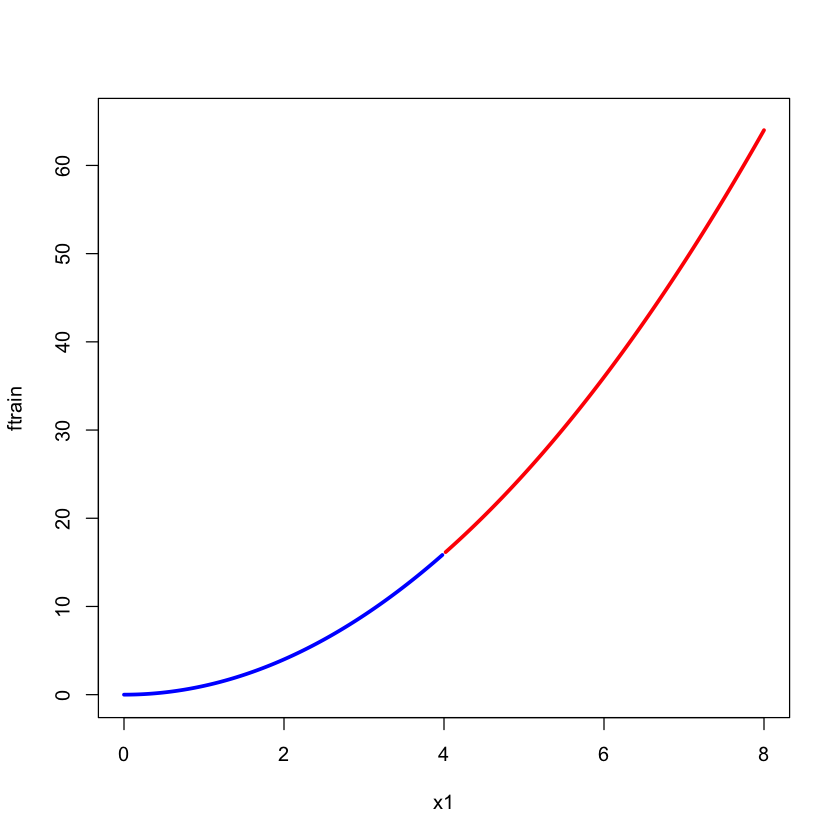

In [17]:
n <- 200
L <- 8
x <- linspace(0, L, n)
x1 <- x[1:100]    # Train
x2 <- x[101:200] # Test
n1 <- length(x1)
n2 <- length(x2)

ftrain <- x1^2 # Train parabola x = [0,4]
ftest <- x2^2 # Test parabola x = [4,8]

plot(x1, ftrain, type="l", lwd="3", col="blue", xlim=c(0, 8), ylim=c(0, 65))
lines(x2, ftest, lwd="3", col="red")

In [33]:
M <- 30 # number of model terms
Eni <- matrix(0, 100, M)
Ene <- matrix(0, 100, M)

for (jj in 1:M) {
    phi_i <- matrix(0, n1,jj+1)
    phi_e <- matrix(0, n2,jj+1)
    for (j in 1:jj) {
        phi_i[,j] <- x1^j # interpolation key
        phi_e[,j] <- x2^j # extrapolation key
    }
    f <- x^2
    for (j in 1:100) {
        fni <- x1^2 + 0.1*rnorm(n1) # interpolation
        fne <- x2^2 + 0.1*rnorm(n2) # extrapolation
        
        ani <- pinv(phi_i, tol=0) %*% fni
        fnai <- phi_i %*% ani
        Eni[j,jj] <- Norm(ftrain-fnai,p=2)/Norm(ftrain,p=2)
        
        fnae <- phi_e %*% ani # use loadings from x in [0,4]
        Ene[j,jj] = Norm(ftest-fnae,p=2)/Norm(ftest,p=2)
    }
}

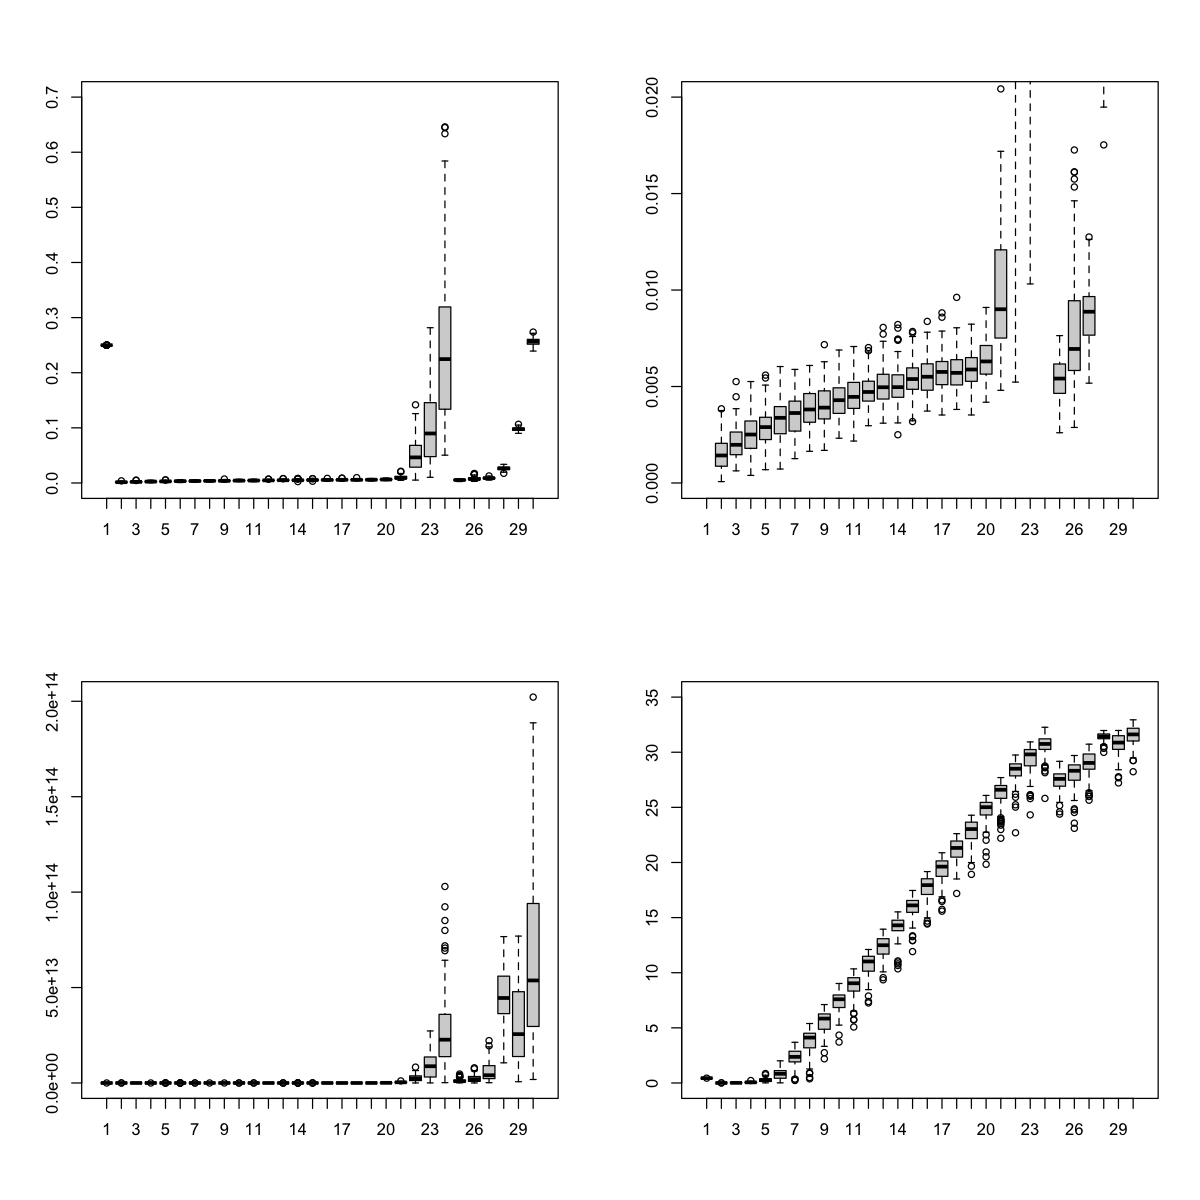

In [37]:
par(mfrow=c(2,2))
options(repr.plot.width=10, repr.plot.height=10)
boxplot(Eni, ylim=c(0,0.7))
boxplot(Eni, ylim=c(0,0.020))
boxplot(Ene)
boxplot(log(Ene+1), ylim=c(0,35))